
# Hate Speech Detection
Information Retrieval PROJECT


Luis V

In [ ]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.pyplot as plt
import missingno as ms

import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

import nltk #NLP must download evertime when using colab

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from sklearn import metrics

from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings("ignore")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas_profiling
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
training_data = pd.read_csv('/content/drive/MyDrive/DTSC_IR/IR_project/train_E6oV3lV.csv')
testing_data = pd.read_csv('/content/drive/MyDrive/DTSC_IR/IR_project/test_tweets_anuFYb8.csv')

In [ ]:
testing_data

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [ ]:
testing_data.shape

(17197, 2)

In [ ]:
pandas_profiling.ProfileReport(testing_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
training_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
pandas_profiling.ProfileReport(training_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
training_data.shape

(31962, 3)

In [ ]:
len(testing_data)

17197

In [ ]:
len(training_data)

31962

In [ ]:

training_data['tweet'].isna().sum()

0

In [ ]:
training_data['label'].isna().sum()

0

In [ ]:
print("Train Data size:", len(training_data))
print("Test Data size", len(testing_data))

Train Data size: 31962
Test Data size 17197


In [ ]:
training_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
nltk.download('stopwords')
eng_stops = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

In [ ]:
def process_message(review_text):
    # remove all the special characters @%*
    new_review_text = re.sub("[^a-zA-Z]", " ",review_text)
    # LC
    words = new_review_text.lower().split()
    # remove stop words
    words = [w for w in words if not w in eng_stops]
    # lemmatizer
    words = [lemmatizer.lemmatize(word) for word in words]
    # join all words back to text
    return (" ".join(words))

In [ ]:
training_data['clean_tweet']=training_data['tweet'].apply(lambda x: process_message(x))

In [ ]:
#greek symbols
training_data['clean_tweet'][1]

'user user thanks lyft credit use cause offer wheelchair van pdx disapointed getthanked'

In [ ]:
training_data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit use cause offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [ ]:
training_data.shape


(31962, 4)

In [ ]:
testing_data.shape

(17197, 2)

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           31962 non-null  int64 
 1   label        31962 non-null  int64 
 2   tweet        31962 non-null  object
 3   clean_tweet  31962 non-null  object
dtypes: int64(2), object(2)
memory usage: 998.9+ KB


In [ ]:
training_data.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

Text(0.5, 1.0, 'Sentiment Data Distribution')

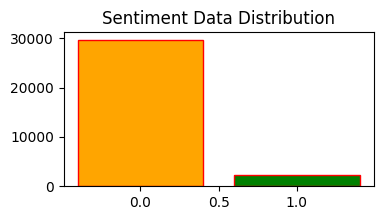

In [ ]:
#Dataset is very imbalanced...

val_count = training_data.label.value_counts()

plt.figure(figsize=(4,2))
plt.bar(val_count.index, val_count.values, color= ['orange', 'green'], edgecolor='red')
plt.title("Sentiment Data Distribution")


In [ ]:
# Data balance
def CPC(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)

    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst

    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

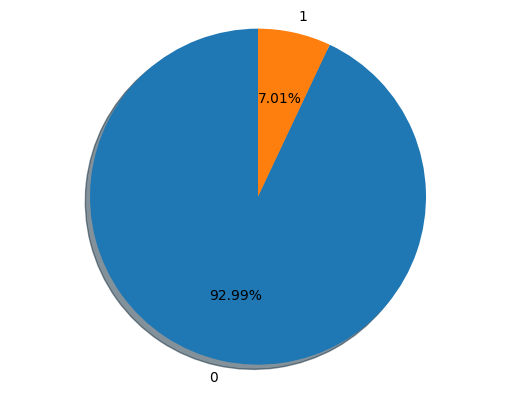

In [ ]:
CPC(training_data.label)

In [ ]:
from wordcloud import WordCloud,STOPWORDS
def WCS(sentiment):
    sentiment_num = 1 if sentiment== 'Hate' else 0
    temp_df = training_data[training_data.label==sentiment_num]
    words = " ".join(temp_df.clean_tweet)
    cleaned_words = " ".join([w for w in words.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='RT'])

    wrdcld = WordCloud(stopwords=STOPWORDS,background_color='white',width=1500,height=1000).generate(cleaned_words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

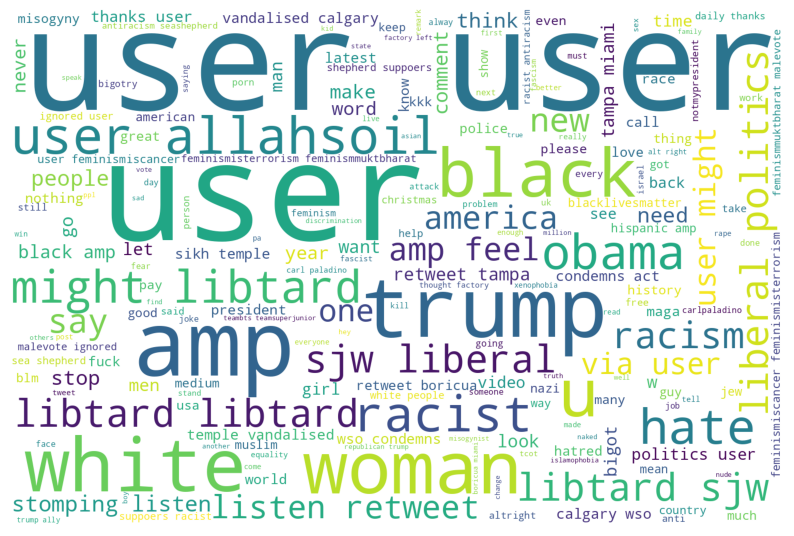

In [ ]:
WCS('Hate')

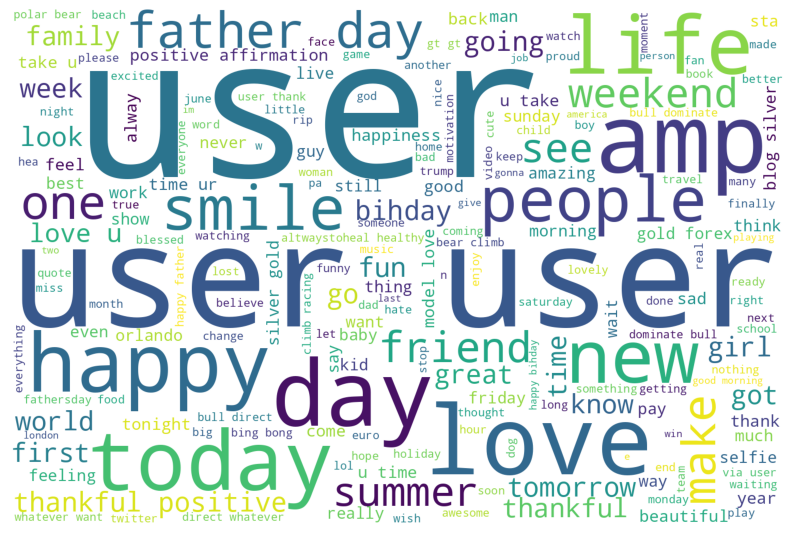

In [ ]:
WCS('Positive')

,label
0,29720
1,2242


0s : 1s  ::   13.26 : 1


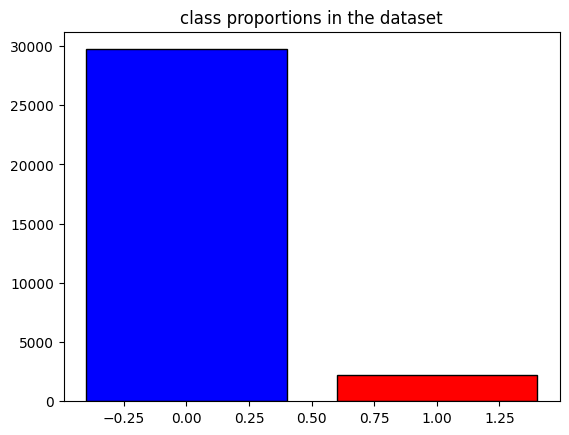

In [ ]:
#Check class distribution in dependent variable
display(training_data['label'].value_counts().to_frame())
print("0s : 1s  ::  ",(training_data['label'].value_counts()[0]/training_data['label'].value_counts()[1]).round(2),": 1")
plt.bar([0,1],training_data['label'].value_counts(),color= ['blue', 'red'], edgecolor='black')
plt.title("class proportions in the dataset")
plt.show()

,label
0,29720
1,6726


0s : 1s  ::   4.42 : 1


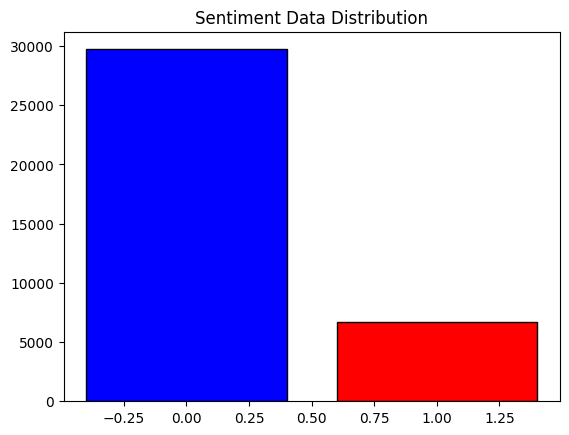

In [ ]:
#Balancing the dataset using Oversampling
data1=training_data[training_data['label']==1]
data0=training_data[training_data['label']==0]
training_data=pd.concat([training_data,data1,data1], axis=0)
training_data

#Check class distribution in dependent variable
display(training_data['label'].value_counts().to_frame())
print("0s : 1s  ::  ",(training_data['label'].value_counts()[0]/training_data['label'].value_counts()[1]).round(2),": 1")
plt.bar([0,1],training_data['label'].value_counts(),color= ['blue', 'red'], edgecolor='black')
plt.title("Sentiment Data Distribution")
plt.show()


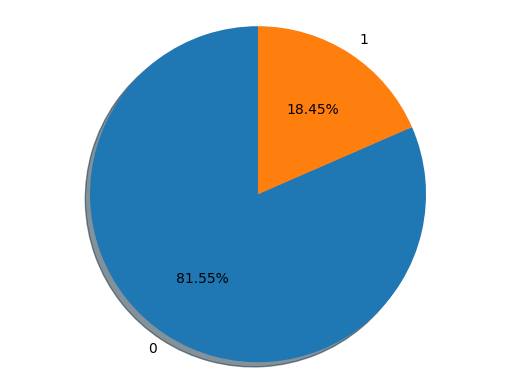

In [ ]:
#rerun chart after oversampling
CPC(training_data.label)

Make test-train split

In [ ]:
#Split 80/20
from sklearn.model_selection import train_test_split
train_df, test_df =  train_test_split(training_data, test_size = 0.2, random_state = 42)

NLP...TF-IDF

In [ ]:
vtr = TfidfVectorizer()
train_tfidf_model = vtr.fit_transform(train_df.clean_tweet)
test_tfidf_model = vtr.transform(test_df.clean_tweet)

In [ ]:
train_tfidf_model

<29156x30856 sparse matrix of type '<class 'numpy.float64'>'
	with 225049 stored elements in Compressed Sparse Row format>

In [ ]:
train_tfidf = pd.DataFrame(train_tfidf_model)
train_tfidf

,0
0,"(0, 28721)\t0.4245583757389982\n (0, 26614)..."
1,"(0, 21255)\t0.3570280145146651\n (0, 17652)..."
2,"(0, 7434)\t0.2457499528326161\n (0, 10286)\..."
3,"(0, 5403)\t0.21098679371606932\n (0, 19793)..."
4,"(0, 15196)\t0.49605466729330067\n (0, 21969..."
...,...
29151,"(0, 12786)\t0.49107514999758195\n (0, 4682)..."
29152,"(0, 2286)\t0.36150577371412873\n (0, 14741)..."
29153,"(0, 29026)\t0.4569473807502767\n (0, 3913)\..."
29154,"(0, 1507)\t0.3259985066707374\n (0, 8471)\t..."


In [ ]:
cls = [LogisticRegression(),
       MultinomialNB(),
       DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=200),
       KNeighborsClassifier(n_neighbors = 5)]

cls_name = []

In [ ]:
test_tfidf_model

<7290x30856 sparse matrix of type '<class 'numpy.float64'>'
	with 52058 stored elements in Compressed Sparse Row format>

In [ ]:
test_df.label.count()

7290

In [ ]:
lbl_actual = test_df.label
i = 0
accuracy = []
for cl in cls:
    model = cl.fit(train_tfidf_model,train_df.label)
    lbl_pred = model.predict(test_tfidf_model)
    a = (100*accuracy_score(lbl_pred, lbl_actual))
    a = round(a,2)
    accuracy.append(a)
    cls_name.append(cl.__class__.__name__)
    print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
    print ( classification_report(lbl_pred, lbl_actual))
    i +=1

LogisticRegression  Accuracy Score : 93.28%
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      6307
           1       0.69      0.92      0.79       983

    accuracy                           0.93      7290
   macro avg       0.84      0.93      0.87      7290
weighted avg       0.95      0.93      0.94      7290

MultinomialNB  Accuracy Score : 93.02%
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      6432
           1       0.63      0.97      0.77       858

    accuracy                           0.93      7290
   macro avg       0.81      0.95      0.86      7290
weighted avg       0.95      0.93      0.94      7290

DecisionTreeClassifier  Accuracy Score : 96.45%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5766
           1       0.98      0.85      0.91      1524

    accuracy                           0.96      72

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7fee800d1c60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


RandomForestClassifier  Accuracy Score : 98.89%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5938
           1       0.98      0.96      0.97      1352

    accuracy                           0.99      7290
   macro avg       0.99      0.98      0.98      7290
weighted avg       0.99      0.99      0.99      7290

KNeighborsClassifier  Accuracy Score : 99.08%
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5982
           1       0.97      0.98      0.97      1308

    accuracy                           0.99      7290
   macro avg       0.98      0.99      0.98      7290
weighted avg       0.99      0.99      0.99      7290



([0, 1, 2, 3, 4],
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'MultinomialNB'),
  Text(2, 0, 'DecisionTreeClassifier'),
  Text(3, 0, 'RandomForestClassifier'),
  Text(4, 0, 'KNeighborsClassifier')])

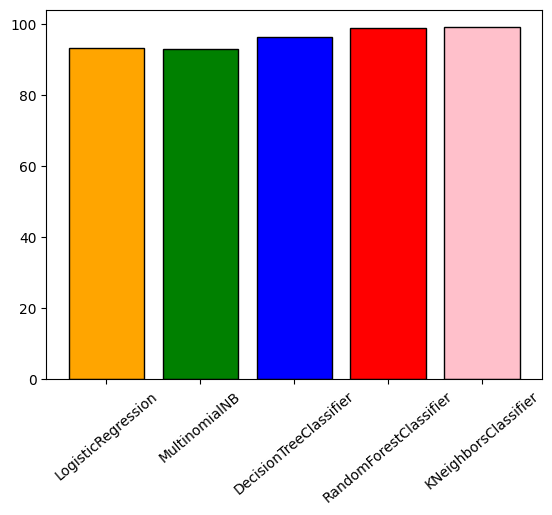

In [ ]:
plt.bar(cls_name, accuracy, color= ['orange', 'green','blue', 'red', 'pink'], edgecolor='black')
plt.xticks(rotation=40)

In [ ]:
# Predict accuracy
def getModelAccuracy_LogicalReg(model_name, sampled_train_df) :
    # bag of words model
    vectorizer = TfidfVectorizer()
    sampled_train_tfidf_model = vectorizer.fit_transform(sampled_train_df.clean_tweet)
    sampled_test_tfidf_model = vectorizer.transform(test_df.clean_tweet)


    # let's look at the dataframe
    #sampled_train_tfidf = pd.DataFrame(sampled_train_tfidf_model.toarray(), columns=vectorizer.get_feature_names())
    #sampled_train_tfidf

    # Predict
    sample_model = LogisticRegression().fit(sampled_train_tfidf_model,sampled_train_df.label)
    lg_lbl_pred = sample_model.predict(sampled_test_tfidf_model)
    a = (100*accuracy_score(lg_lbl_pred, lbl_actual))
    a = round(a,2)
    print ("{}  Accuracy Score : {}%".format(model_name,a))
    #print(type(a))
    return float(a)

In [ ]:
# Predict accuracy using rfc
def getModelAccuracy_RFC(model_name, sampled_train_df) :

    # bag of words model
    vectorizer = TfidfVectorizer()
    sampled_train_tfidf_model = vectorizer.fit_transform(sampled_train_df.clean_tweet)
    sampled_test_tfidf_model = vectorizer.transform(test_df.clean_tweet)

    # Predict
    sample_model = RandomForestClassifier(n_estimators=200).fit(sampled_train_tfidf_model,sampled_train_df.label)
    lg_lbl_pred = sample_model.predict(sampled_test_tfidf_model)
    a = (100*accuracy_score(lg_lbl_pred, lbl_actual))
    a = round(a,2)
    print ("{}  Accuracy Score : {}%".format(model_name,a))
    return float(a)

In [ ]:
log_accuracy = []
rfc_accuracy = []

In [ ]:
log_accuracy = []
rfc_accuracy = []
a = getModelAccuracy_LogicalReg("Train dataset", train_df)
#print(a)
log_accuracy.append(a)

Train dataset  Accuracy Score : 93.28%


In [ ]:
log_accuracy

[93.28]

In [ ]:
a = getModelAccuracy_RFC("Train dataset", train_df)
rfc_accuracy.append(a)

Train dataset  Accuracy Score : 98.79%


In [ ]:
rfc_accuracy

[98.79]

Data Imbalance Handling

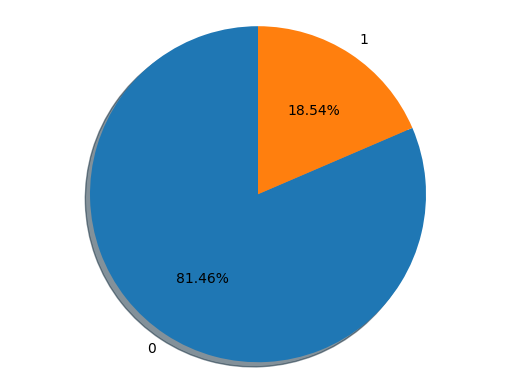

In [ ]:
CPC(train_df.label)

In [ ]:
print(train_df.label.value_counts())

0    23751
1     5405
Name: label, dtype: int64


In [ ]:
# Predict accuracy using rfc
def getModelAccuracy_RFC(model_name, sampled_train_df) :

    # bag of words model
    vtr = TfidfVectorizer()
    sampled_train_tfidf_model = vtr.fit_transform(sampled_train_df.clean_tweet)
    sampled_test_tfidf_model = vtr.transform(test_df.clean_tweet)

    # Predict
    sample_model = RandomForestClassifier(n_estimators=200).fit(sampled_train_tfidf_model,sampled_train_df.label)
    lg_lbl_pred = sample_model.predict(sampled_test_tfidf_model)
    a = (100*accuracy_score(lg_lbl_pred, lbl_actual))
    a = round(a,2)
    print ("{}  Accuracy Score : {}%".format(model_name,a))
    return float(a)

In [ ]:
log_accuracy = []
rfc_accuracy = []

In [ ]:
a = getModelAccuracy_LogicalReg("Train dataset", train_df)
#print(a)
log_accuracy.append(a)

Train dataset  Accuracy Score : 93.28%


In [ ]:
a = getModelAccuracy_RFC("Train dataset", train_df)
rfc_accuracy.append(a)

Train dataset  Accuracy Score : 98.92%


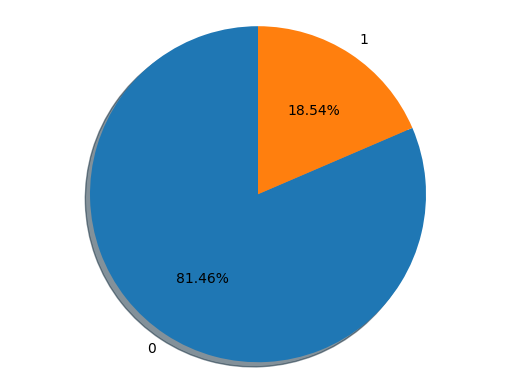

In [ ]:
CPC(train_df.label)

In [ ]:
print(train_df.label.value_counts())

0    23751
1     5405
Name: label, dtype: int64


In [ ]:
training_data

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit use cause offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation
...,...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...,lady banned kentucky mall user jcpenny kentucky
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...,user omfg offended mailbox proud mailboxpride ...
31947,31948,1,@user @user you don't have the balls to hashta...,user user ball hashtag say weasel away lumpy t...
31948,31949,1,"makes you ask yourself, who am i? then am i a...",make ask anybody god oh thank god


In [ ]:
train_df

,id,label,tweet,clean_tweet
5673,5674,0,testing out the new bellamianta tan here @user...,testing new bellamianta tan user user user user
3301,3302,1,trump #corruptgop @user @user history can not...,trump corruptgop user user history erased mone...
4227,4228,0,camiilabeckeer #divulgaÃ§Ã£oeparceria #inshot...,camiilabeckeer divulga oeparceria inshot girl ...
7922,7923,0,detroit may have had stronger claim on red win...,detroit may stronger claim red wing tv revenue...
919,920,0,i always help others. never myself. because ot...,always help others never people matter clearly...
...,...,...,...,...
16850,16851,0,"the most cheesiest picture ever, but i love it...",cheesiest picture ever love love cheese weddin...
6265,6266,0,jst the past few weeks a close family frnd was...,jst past week close family frnd kidnaped beatt...
11284,11285,0,from #bracelet #vintagestyle w/free #butterfl...,bracelet vintagestyle w free butterfly charm f...
860,861,1,black professor makes assumptions about an ent...,black professor make assumption entire race wh...


In [ ]:
testing_data

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [ ]:
testing_data['clean_tweet']=testing_data['tweet'].apply(lambda x: process_message(x))

In [ ]:
# NLP
vectorizer = TfidfVectorizer()
sampled_train_tfidf_model = vectorizer.fit_transform(train_df.clean_tweet)
sampled_test_tfidf_model = vectorizer.transform(testing_data.clean_tweet)


# Predict using LR
sample_model = LogisticRegression().fit(sampled_train_tfidf_model,train_df.label)
predict_LR = sample_model.predict(sampled_test_tfidf_model)

In [ ]:
predict_LR = pd.DataFrame({'id': testing_data.id,
                            'tweet' : testing_data.tweet,
                            'label' : predict_LR})
predict_LR.head()

,id,tweet,label
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0


In [ ]:
predict_LR.label.value_counts()

0    16249
1      948
Name: label, dtype: int64

In [ ]:
predict_LR.to_csv('hate_speech_output.csv', index=False)

In [ ]:
# this can be done for other classifcation models
#submit CSV file for project

Thank you!